# Analyze Polysome/Monosome
- iteration 8: old data
- iteration 11: new data

# Basic Statistics

In [4]:
import os
from pybedtools import BedTool
import pandas as pd
import seaborn as sns
from plot_params import *
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_recall_curve
from matplotlib_venn import venn2


indir = Path('/tscc/lustre/ddn/scratch/s5xu/circSTAMP_pipe/3_pulldown_sucrose/output')

In [5]:
mega_anno = pd.read_csv(indir / 'circle_summary/all_circle_annotation.csv', index_col = 0)
stats_df = pd.read_csv(indir / 'circle_summary/ciri_stats.csv', index_col = 0)
counts = pd.read_csv(indir / 'circle_summary/circ_type_counts.csv', index_col = 0)
bsj = pd.read_csv(indir / 'circle_summary/BSJ_counts.csv', index_col = 0)
fsj = pd.read_csv(indir / 'circle_summary/FSJ_counts.csv', index_col = 0)
junc = pd.read_csv(indir / 'circle_summary/junction_ratio.csv', index_col = 0)

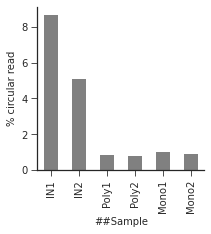

In [6]:
(stats_df['frac_circular']*100).plot.bar(figsize = (3,3), color = 'grey')
plt.ylabel('% circular read')
sns.despine()
plt.savefig(figdir/'6_ribo_fraction_circle.pdf')

In [7]:
bsj_cpm=bsj.div(stats_df['##Total_Reads'], axis = 1)*10**6
fsj_cpm=fsj.div(stats_df['##Total_Reads'], axis = 1)*10**6

# Types of circular RNA detected and basic statisics

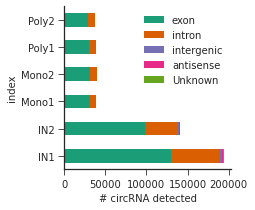

In [9]:
counts.sort_index().plot.barh(stacked = True, figsize = (3,3))
plt.xlabel('# circRNA detected')
sns.despine()
plt.savefig(figdir/'6_ribo_n_circle.pdf')

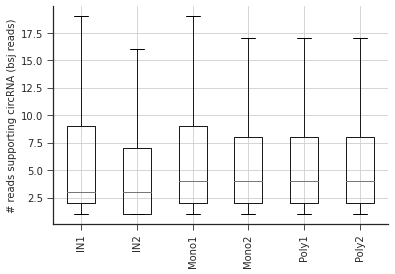

In [10]:
bsj.reindex(sorted(bsj.columns), axis=1).boxplot(showfliers=False, rot = 90)
plt.ylabel('# reads supporting circRNA (bsj reads)')
sns.despine()

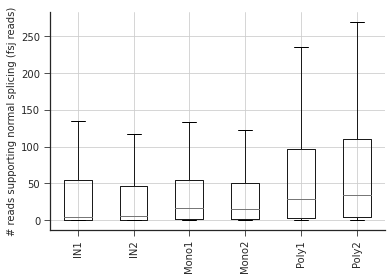

In [11]:
fsj.reindex(sorted(fsj.columns), axis=1).boxplot(showfliers=False, rot = 90)
plt.ylabel('# reads supporting normal splicing (fsj reads)')
sns.despine()

Text(0, 0.5, '(BSJ+1)/(FSJ+1)')

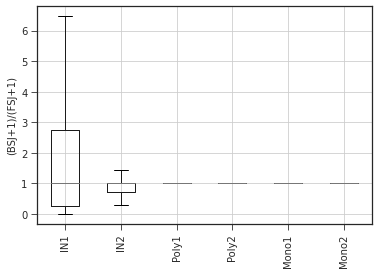

In [12]:
((bsj.fillna(0)+1)/(fsj.fillna(0)+1)).boxplot(showfliers=False, rot = 90)
plt.ylabel('(BSJ+1)/(FSJ+1)')

# CircRIP output: is not great

In [13]:
# def read_circRIP_outputs(indir, sample1, sample2):
#     rip_output = pd.read_csv(Path(indir)/'circRIP/'/f'{sample1}_vs_{sample2}',
#     sep = '\t', names = ['circ_id', 'gene', 'BSJs in IP',
#             'circRNA in Input','CPM in IP','CPM in Input',
#             'IP/Input ratio','p-value', 'status'],
#                 comment = '>'
#             )
#     # annotation
#     circ_df, stat = read_ciri_gtf(Path(indir)/f'{sample1}.gtf')
#     rip_output = rip_output.merge(circ_df, left_on = 'circ_id', right_on = 'circ_id')
#     return rip_output

In [15]:
# monosome_output1_1 = read_circRIP_outputs(indir1, 'PP_Monosome1', 'PP_Input1')
# monosome_output1_2 = read_circRIP_outputs(indir1, 'PP_Monosome2', 'PP_Input2')
# polysome_output1_1 = read_circRIP_outputs(indir1, 'PP_Polysome1', 'PP_Input1')
# polysome_output1_2 = read_circRIP_outputs(indir1, 'PP_Polysome2', 'PP_Input2')
# monosome_output2_1 = read_circRIP_outputs(indir2, 'Mono1', 'IN1')
# monosome_output2_2 = read_circRIP_outputs(indir2, 'Mono2', 'IN2')
# polysome_output2_1 = read_circRIP_outputs(indir2, 'Poly1', 'IN1')
# polysome_output2_2 = read_circRIP_outputs(indir2, 'Poly2', 'IN2')

In [16]:
# all_rip_outputs = [monosome_output1_1, monosome_output1_2, polysome_output1_1, polysome_output1_2,
#                   monosome_output2_1, monosome_output2_2, polysome_output2_1, polysome_output2_2]

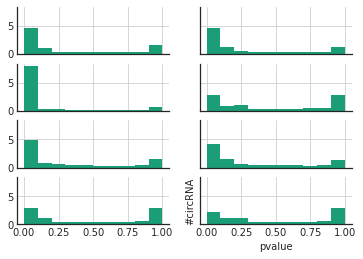

In [17]:
# f, axes = plt.subplots(4,2, sharex = True, sharey = True)

# for output, ax in zip(all_rip_outputs, axes.flatten()):
#     output['p-value'].hist(ax=ax, density = True)
    
# plt.xlabel('pvalue')
# plt.ylabel('#circRNA')
# sns.despine()

Text(0, 0.5, '# circular RNA')

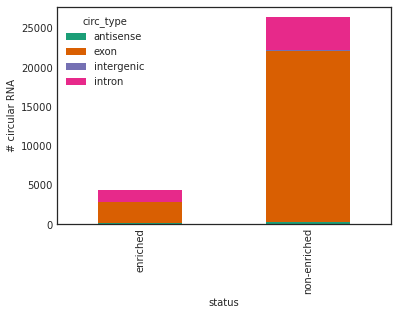

In [18]:
# cnt = polysome_output2_1.groupby(by = ['circ_type', 'status']).count()['circ_id'].unstack()
# cnt.T.plot.bar(stacked = True)
# plt.ylabel('# circular RNA')

In [19]:
# for output in all_rip_outputs:
#     print(
#         output.loc[(output['gene'].str.contains('ZNF609'))&(output['circ_id'].str.contains('166'))
                   
#                    , ['circ_id', 'status', 'p-value']]
#     )
# # Chr15:64499292-64500166  is the one on literature

                      circ_id        status       p-value
5882  chr15:64499293|64500166  non-enriched  1.110223e-16
                      circ_id        status  p-value
6394  chr15:64499293|64500166  non-enriched  0.92012
Empty DataFrame
Columns: [circ_id, status, p-value]
Index: []
                      circ_id        status  p-value
4857  chr15:64499293|64500166  non-enriched      1.0
                       circ_id    status       p-value
10659  chr15:64499293|64500166  enriched  1.110223e-16
                       circ_id        status   p-value
10436  chr15:64499293|64500166  non-enriched  0.999838
                       circ_id    status       p-value
10298  chr15:64499293|64500166  enriched  1.110223e-16
                       circ_id        status  p-value
10104  chr15:64499293|64500166  non-enriched      1.0


# My outputs: Beta-binom

# TODO: run published dataset?

In [14]:
#annot2 = pd.read_csv(Path(indir)/'count_table.tsv', sep = '\t', index_col = 0)
my_monosome_output2_1 = pd.read_csv(Path(indir) /'RIP/Mono1.IN1.csv', index_col = 0)
my_monosome_output2_2 = pd.read_csv(Path(indir) /'RIP/Mono2.IN2.csv', index_col = 0)
my_polysome_output2_1 = pd.read_csv(Path(indir) /'RIP/Poly1.IN1.csv', index_col = 0)
my_polysome_output2_2 = pd.read_csv(Path(indir) /'RIP/Poly2.IN2.csv', index_col = 0)

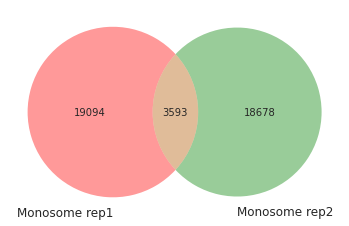

In [15]:
FDR_threshold = 0.2

venn2([set(my_monosome_output2_1.loc[my_monosome_output2_1['FDR']<FDR_threshold, 'circ_id']),
           set(my_monosome_output2_2.loc[my_monosome_output2_2['FDR']<FDR_threshold, 'circ_id'])
          ],set_labels = ['Monosome rep1', 'Monosome rep2'])


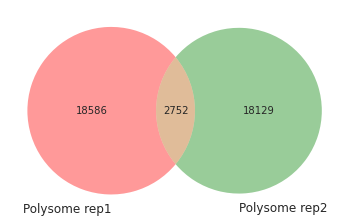

In [16]:
FDR_threshold = 0.2

venn2([set(my_polysome_output2_1.loc[my_polysome_output2_1['FDR']<FDR_threshold, 'circ_id']),
           set(my_polysome_output2_2.loc[my_polysome_output2_2['FDR']<FDR_threshold, 'circ_id'])
          ],set_labels = ['Polysome rep1', 'Polysome rep2'])


In [17]:
monosome_reproducible = set(my_monosome_output2_1.loc[my_monosome_output2_1['FDR']<FDR_threshold, 'circ_id']
                           ).intersection(set(my_monosome_output2_2.loc[my_monosome_output2_2['FDR']<FDR_threshold, 'circ_id'])
                                         )
polysome_reproducible = set(my_polysome_output2_1.loc[my_polysome_output2_1['FDR']<FDR_threshold, 'circ_id']
                           ).intersection(set(my_polysome_output2_2.loc[my_polysome_output2_2['FDR']<FDR_threshold, 'circ_id'])
                                         )
        

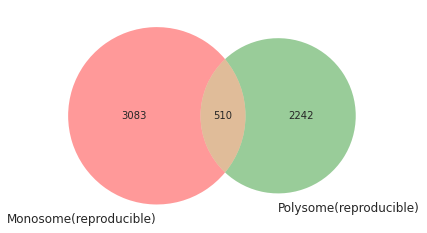

In [18]:
venn2([monosome_reproducible,
           polysome_reproducible
          ],set_labels = ['Monosome(reproducible)', 'Polysome(reproducible)'])
plt.savefig(figdir/'6_ribo_venn_mono_poly.pdf')

In [21]:
mega_anno['is_Monosome']=mega_anno.index.isin(monosome_reproducible)
mega_anno['is_Polysome']=mega_anno.index.isin(polysome_reproducible)

In [22]:
tested = set(my_monosome_output2_1.loc[my_monosome_output2_1['tested'], 'circ_id']).intersection(
    set(my_monosome_output2_2.loc[my_monosome_output2_2['tested'], 'circ_id'])).intersection(
    set(my_polysome_output2_1.loc[my_polysome_output2_1['tested'], 'circ_id'])).intersection(
    set(my_polysome_output2_2.loc[my_polysome_output2_2['tested'], 'circ_id']))

In [23]:
len(tested)

31849

In [25]:
circtype_counts = mega_anno.loc[mega_anno.index.isin(tested)].groupby(by = ['is_Monosome', 'is_Polysome'])['circ_type'].value_counts(
).unstack().fillna(0)

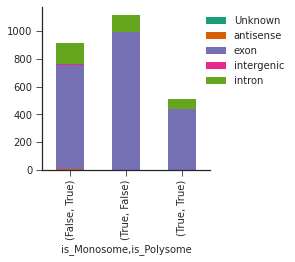

In [26]:
circtype_counts.iloc[1:,].plot.bar(stacked = True, figsize = (3,3))
plt.legend(bbox_to_anchor = (1.5, 1))
sns.despine()
plt.savefig(figdir/'6_ribo_enriched_circtype.pdf')

In [27]:
circtype_counts.div(circtype_counts.sum(axis = 1), axis = 0)

circ_type                 Unknown  antisense      exon  intergenic    intron
is_Monosome is_Polysome                                                     
False       False        0.000136   0.002149  0.861729    0.005356  0.130629
            True         0.000000   0.008782  0.818880    0.009879  0.162459
True        False        0.000000   0.001792  0.884409    0.004480  0.109319
            True         0.000000   0.001961  0.856863    0.003922  0.137255

In [28]:
cont = pd.concat([circtype_counts.loc[:, circtype_counts.columns!='exon'].sum(axis = 1),
          circtype_counts['exon']], axis = 1)

In [29]:
cont

0     exon
is_Monosome is_Polysome                 
False       False        4053.0  25259.0
            True          165.0    746.0
True        False         129.0    987.0
            True           73.0    437.0

In [30]:
from scipy.stats import fisher_exact,chisquare
def testing(df):
    ''' perform fisher exact or chisq given contingency table'''
    if df.shape != (2,2):
        # some outcomes are unobserved
        print(df.shape)
        print('no binding is observed in')
        return 1, np.nan
    if df.le(5).any().any():
        odds_ratio, pvalue = fisher_exact(df)
    else:
        chi, pvalue = chisquare(df.loc[True], (df.loc[True].sum())*df.loc[False].div(df.loc[False].sum()))
        odds_ratio = (df.loc[True, True]/df.loc[True, False])/(df.loc[False, True]/df.loc[False, False])
    return pvalue, odds_ratio

In [31]:
mega_anno.loc[(mega_anno['gene_name']=='ZNF609')&(mega_anno.index.str.contains('166'))]

,seqname,start,end,strand,circ_type,gene_id,gene_name,gene_type,is_Monosome,is_Polysome
circ_id,,,,,,,,,,
chr15:64495840|64500166,chr15,64495840.0,64500166.0,+,intron,ENSG00000180357.9,ZNF609,protein_coding,False,False
chr15:64499293|64500166,chr15,64499293.0,64500166.0,+,exon,ENSG00000180357.9,ZNF609,protein_coding,False,False


## Compare with published results

In [32]:
transcirc = pd.read_csv('../notebook/transcirc_metadata.tsv', sep = '\t')
transcirc['circ_id']=transcirc['chrom']+':'+transcirc['start'].astype(str)+'|'+transcirc['end'].astype(str)
transcirc.drop_duplicates(subset = ['circ_id'], inplace = True)

In [33]:
all_data = pd.merge(transcirc, mega_anno.reset_index()[['circ_id', 'is_Monosome', 'is_Polysome']]
         , left_on = 'circ_id'
         , right_on = 'circ_id')
         

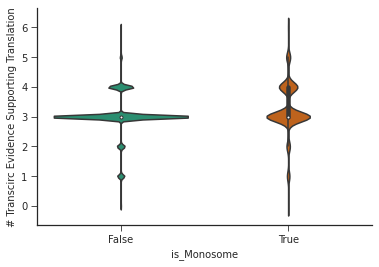

Text(0, 0.5, '# Transcirc Evidence Supporting Translation')

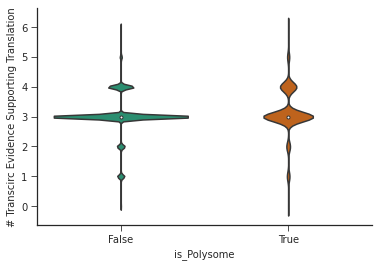

In [34]:
sns.violinplot(data = all_data, x = 'is_Monosome', y= 'evidences_num',
               figsize = (3,3)
             )
sns.despine()
plt.ylabel('# Transcirc Evidence Supporting Translation')
plt.show()
sns.violinplot(data = all_data, x = 'is_Polysome', y= 'evidences_num',
               figsize = (3,3)
             )
sns.despine()
plt.ylabel('# Transcirc Evidence Supporting Translation')

In [35]:
evidence_num_df = all_data.groupby(by = ['is_Monosome', 'is_Polysome']
                                  )['evidences_num'].value_counts().unstack().fillna(0)

In [36]:
evidence_num_df

evidences_num                0       1       2        3        4       5     6
is_Monosome is_Polysome                                                       
False       False        171.0  4232.0  4693.0  89891.0  15549.0  1099.0  26.0
            True           4.0    59.0    77.0   1180.0    297.0    30.0   0.0
True        False          1.0    82.0   104.0   1473.0    552.0   124.0   8.0
            True           1.0    12.0    25.0    218.0    162.0    28.0   3.0

In [37]:
evidence_rate_df = evidence_num_df.div(evidence_num_df.sum(axis = 1), axis = 0)

In [38]:
evidence_rate_df

evidences_num                   0         1         2         3         4  \
is_Monosome is_Polysome                                                     
False       False        0.001478  0.036590  0.040575  0.777194  0.134436   
            True         0.002429  0.035823  0.046752  0.716454  0.180328   
True        False        0.000427  0.034983  0.044369  0.628413  0.235495   
            True         0.002227  0.026726  0.055679  0.485523  0.360802   

evidences_num                   5         6  
is_Monosome is_Polysome                      
False       False        0.009502  0.000225  
            True         0.018215  0.000000  
True        False        0.052901  0.003413  
            True         0.062361  0.006682

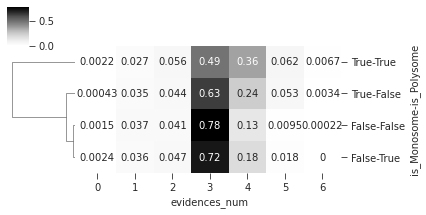

In [39]:
sns.clustermap(evidence_rate_df, col_cluster = False, cmap = 'Greys', annot = True,
              figsize = (6,3), metric = 'correlation')
plt.savefig(figdir/'6_ribo_transcirc_n_evidence.pdf')

In [40]:
all_data['4_or_more_evidence']=all_data['evidences_num']>=4

In [41]:
pv_mono, odds_mono = testing(
    all_data.groupby(by = ['is_Monosome', '4_or_more_evidence']).count()['circ_id'].unstack())
print(pv_mono, odds_mono)

3.933247175333583e-142 2.7006037284556146


In [42]:
all_data['Both_Monosome_Polysome']=(all_data['is_Monosome'])&(all_data['is_Polysome'])

In [43]:
pv_poly, odds_poly = testing(all_data.groupby(
    by = ['is_Polysome', '4_or_more_evidence']).count()['circ_id'].unstack())
print(pv_poly, odds_poly)

6.013115047242821e-39 1.9131467343719568


In [44]:
pv_both, odds_both = testing(all_data.groupby(
    by = ['Both_Monosome_Polysome', '4_or_more_evidence']).count()['circ_id'].unstack())
print(pv_both, odds_both)

1.2586553142678072e-63 4.346822651611535


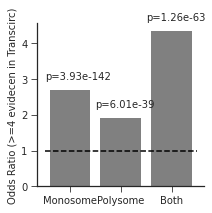

In [45]:
f, ax = plt.subplots(1,1, figsize = (3,3))
ax.bar(x = [0,1,2], height = [odds_mono, odds_poly, odds_both], color = 'grey')
plt.text(0-0.5, odds_mono+0.3, f'p={pv_mono:.2e}')
plt.text(1-0.5, odds_poly+0.3, f'p={pv_poly:.2e}')
plt.text(2-0.5, odds_both+0.3, f'p={pv_both:.2e}')
plt.ylabel('Odds Ratio (>=4 evidecen in Transcirc)')
plt.xticks([0,1,2], ['Monosome', 'Polysome', 'Both'])
plt.hlines(y = 1, xmin = -0.5, xmax = 2.5, linestyle = '--', color = 'black')
sns.despine()
plt.savefig(figdir/'6_ribo_transcirc_n_evidence_oddsratio.pdf')

In [46]:
m6A_num_df = all_data.groupby(by = ['is_Monosome', 'is_Polysome'])['m6A'].value_counts().unstack().fillna(0)
m6A_num_df

m6A                         0.0    1.0
is_Monosome is_Polysome               
False       False        103365  12296
            True           1453    194
True        False          1904    440
            True            385     64

In [47]:
all_data['m6A'] = (all_data['m6A']>0)
pv_poly_m6A, odds_poly_m6A = testing(all_data.groupby(by = ['is_Polysome', 'm6A']).count()['circ_id'].unstack())
pv_mono_m6A, odds_mono_m6A  = testing(all_data.groupby(by = ['is_Monosome', 'm6A']).count()['circ_id'].unstack())
pv_both_m6A, odds_both_m6A  = testing(all_data.groupby(by = ['Both_Monosome_Polysome', 'm6A']).count()['circ_id'].unstack())

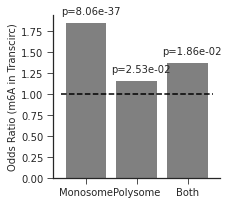

In [48]:
f, ax = plt.subplots(1,1, figsize = (3,3))
ax.bar(x = [0,1,2], height = [odds_mono_m6A, odds_poly_m6A, odds_both_m6A], color = 'grey')
plt.text(0-0.5, odds_mono_m6A+0.1, f'p={pv_mono_m6A:.2e}')
plt.text(1-0.5, odds_poly_m6A+0.1, f'p={pv_poly_m6A:.2e}')
plt.text(2-0.5, odds_both_m6A+0.1, f'p={pv_both_m6A:.2e}')
plt.ylabel('Odds Ratio (m6A in Transcirc)')
plt.xticks([0,1,2], ['Monosome', 'Polysome', 'Both'])
plt.hlines(y = 1, xmin = -0.5, xmax = 2.5, linestyle = '--', color = 'black')
sns.despine()
plt.savefig(figdir/'6_ribo_transcirc_m6A_oddsratio.pdf')

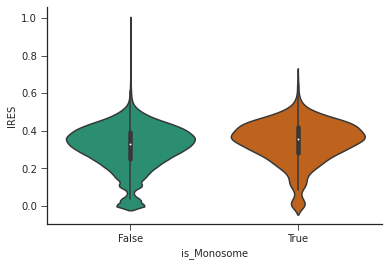

In [49]:
sns.violinplot(data = all_data, x = 'is_Monosome', y= 'IRES',
             )
sns.despine()

# the sum of z-score


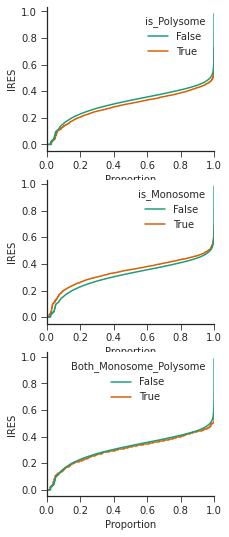

In [50]:
f, ax = plt.subplots(3,1, figsize = (3,9))
sns.ecdfplot(data = all_data, hue = 'is_Polysome', y= 'IRES',
             ax = ax[0]
             )
sns.ecdfplot(data = all_data, hue = 'is_Monosome', y= 'IRES',
             ax = ax[1]
             )
sns.ecdfplot(data = all_data, hue = 'Both_Monosome_Polysome', y= 'IRES',
             ax = ax[2]
             )
sns.despine()
plt.savefig(figdir/'6_ribo_transcirc_ires_ecdf.pdf')

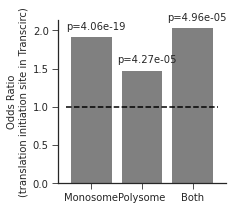

In [51]:
#translation initiation site
all_data['TIS'] = all_data['TIS'].map({0:False, 1:True})
pv_poly_tis, odds_poly_tis = testing(
    all_data.groupby(by = ['is_Polysome', 'TIS']).count()['circ_id'].unstack())
pv_mono_tis, odds_mono_tis  = testing(
    all_data.groupby(by = ['is_Monosome', 'TIS']).count()['circ_id'].unstack())
pv_both_tis, odds_both_tis  = testing(
    all_data.groupby(by = ['Both_Monosome_Polysome', 'TIS']).count()['circ_id'].unstack())

f, ax = plt.subplots(1,1, figsize = (3,3))
ax.bar(x = [0,1,2], height = [odds_mono_tis, odds_poly_tis, odds_both_tis], color = 'grey')
plt.text(0-0.5, odds_mono_tis+0.1, f'p={pv_mono_tis:.2e}')
plt.text(1-0.5, odds_poly_tis+0.1, f'p={pv_poly_tis:.2e}')
plt.text(2-0.5, odds_both_tis+0.1, f'p={pv_both_tis:.2e}')
plt.ylabel('Odds Ratio\n(translation initiation site in Transcirc)')
plt.xticks([0,1,2], ['Monosome', 'Polysome', 'Both'])
plt.hlines(y = 1, xmin = -0.5, xmax = 2.5, linestyle = '--', color = 'black')
sns.despine()
plt.savefig(figdir/'6_ribo_transcirc_TIS_oddsratio.pdf')

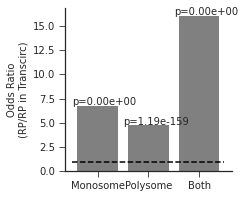

In [52]:
all_data['is_RP']=all_data['RP/RP']>0

pv_poly_rp, odds_poly_rp = testing(
    all_data.groupby(by = ['is_Polysome', 'is_RP']).count()['circ_id'].unstack())
pv_mono_rp, odds_mono_rp  = testing(
    all_data.groupby(by = ['is_Monosome', 'is_RP']).count()['circ_id'].unstack())
pv_both_rp, odds_both_rp  = testing(
    all_data.groupby(by = ['Both_Monosome_Polysome', 'is_RP']).count()['circ_id'].unstack())

f, ax = plt.subplots(1,1, figsize = (3,3))
ax.bar(x = [0,1,2], height = [odds_mono_rp, odds_poly_rp, odds_both_rp], color = 'grey')
plt.text(0-0.5, odds_mono_rp+0.1, f'p={pv_mono_rp:.2e}')
plt.text(1-0.5, odds_poly_rp+0.1, f'p={pv_poly_rp:.2e}')
plt.text(2-0.5, odds_both_rp+0.1, f'p={pv_both_rp:.2e}')
plt.ylabel('Odds Ratio\n(RP/RP in Transcirc)')
plt.xticks([0,1,2], ['Monosome', 'Polysome', 'Both'])
plt.hlines(y = 1, xmin = -0.5, xmax = 2.5, linestyle = '--', color = 'black')
sns.despine()
plt.savefig(figdir/'6_ribo_transcirc_RP_oddsratio.pdf')

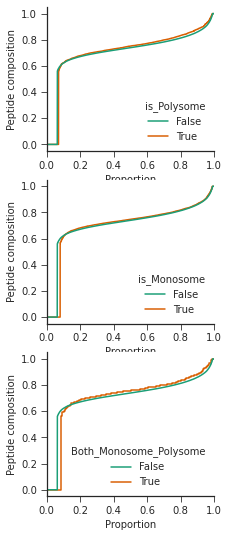

In [53]:
f, ax = plt.subplots(3,1, figsize = (3,9))
sns.ecdfplot(data = all_data, hue = 'is_Polysome', y= 'Peptide composition',
             ax = ax[0]
             )
sns.ecdfplot(data = all_data, hue = 'is_Monosome', y= 'Peptide composition',
             ax = ax[1]
             )
sns.ecdfplot(data = all_data, hue = 'Both_Monosome_Polysome', y= 'Peptide composition',
             ax = ax[2]
             )
sns.despine()
plt.savefig(figdir/'6_ribo_transcirc_peptide_comp_ecdf.pdf')

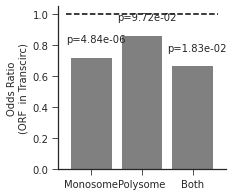

In [54]:
all_data['ORF'] = all_data['ORF'].map({0:False, 1:True})


pv_poly_rp, odds_poly_rp = testing(
    all_data.groupby(by = ['is_Polysome', 'ORF']).count()['circ_id'].unstack())
pv_mono_rp, odds_mono_rp  = testing(
    all_data.groupby(by = ['is_Monosome', 'ORF']).count()['circ_id'].unstack())
pv_both_rp, odds_both_rp  = testing(
    all_data.groupby(by = ['Both_Monosome_Polysome', 'ORF']).count()['circ_id'].unstack())

f, ax = plt.subplots(1,1, figsize = (3,3))
ax.bar(x = [0,1,2], height = [odds_mono_rp, odds_poly_rp, odds_both_rp], color = 'grey')
plt.text(0-0.5, odds_mono_rp+0.1, f'p={pv_mono_rp:.2e}')
plt.text(1-0.5, odds_poly_rp+0.1, f'p={pv_poly_rp:.2e}')
plt.text(2-0.5, odds_both_rp+0.1, f'p={pv_both_rp:.2e}')
plt.ylabel('Odds Ratio\n(ORF  in Transcirc)')
plt.xticks([0,1,2], ['Monosome', 'Polysome', 'Both'])
plt.hlines(y = 1, xmin = -0.5, xmax = 2.5, linestyle = '--', color = 'black')
sns.despine()
plt.savefig(figdir/'6_ribo_transcirc_ORF_oddsratio.pdf')

In [55]:
all_data.to_csv(figdir / '6_mono_poly_circ.csv')